# Analysis of Shh target genes when Shh is ectopically expressed in CA1 pyramidal neurons by in-utero electroporation.
## Line profiles were taken from immuno images of Kir4.1, Glast, GlyT, and GAT3 using the associated imagej scripts

## Libraries

In [1]:
from profiles import profiles
from profiles.profiles import trace_per_animal_by_geno, plot_datapoints, grouped_ttests
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## File Locations and image scale


In [2]:
animal_file = "../data/ICR_203/animal_meta.csv"
animal_meta = pd.read_csv(animal_file)
animal_meta['animal'] = animal_meta['animal'].astype(str)
data_path = "../data/ICR_203/"
# add image scale
# add regions
zero = 0
subregions = {'SPy': np.r_[zero - 50:zero + 50],
           'periSPy': np.r_[zero - 150:zero - 50, zero + 50:zero + 150],
              'SO': np.r_[-400:-150],
              'SR': np.r_[100:500]
           }

## The cohort:

In [3]:
print(animal_meta.loc[:, ('animal', 'geno')])

   animal     geno
0   203-1  Vehicle
1   203-2  Vehicle
2   203-3  Vehicle
3   203-4  Vehicle
4   203-5  Vehicle
5   203-6      DOX
6   203-9      DOX
7  203-11      DOX


## sample the dataset

In [4]:
#ICR203 = profiles.sample_data_folder(data_path, animal_meta, 10)
# rewrite parse_data_folder and parse_ij to sample dataset
# populate metadata slot on dataset object
#ICR203.create_meta()
#ICR203.meta.head()

## the entire dataset

In [5]:
ICR203 = profiles.parse_data_folder(data_path, animal_meta)
# rewrite parse_data_folder and parse_ij to sample dataset
# populate metadata slot on dataset object
ICR203.create_meta()
ICR203.meta.head()




,name,image,animal,geno,stain,region
0,None,203-11_GFP_GLAST_KIR_CONTRA_0004.oif,203-11,DOX,GFP,CONTRA
1,None,203-11_GFP_GLAST_KIR_CONTRA_0004.oif,203-11,DOX,GFP,CONTRA
2,None,203-11_GFP_GLAST_KIR_CONTRA_0004.oif,203-11,DOX,GFP,CONTRA
3,None,203-11_GFP_GLAST_KIR_CONTRA_0004.oif,203-11,DOX,GFP,CONTRA
4,None,203-11_GFP_GLAST_KIR_CONTRA_0004.oif,203-11,DOX,GFP,CONTRA


## Generate a long dataframe of the dataset suitable for line plots

In [6]:

ICR203.data = ICR203.long()

/Users/wtf/.conda/envs/immuno_profile/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
ICR203.meta.groupby(["geno"]).nunique()

,name,image,animal,geno,stain,region
geno,,,,,,
DOX,0,26,3,1,5,2
Vehicle,0,56,5,1,5,2


## plot heatmaps

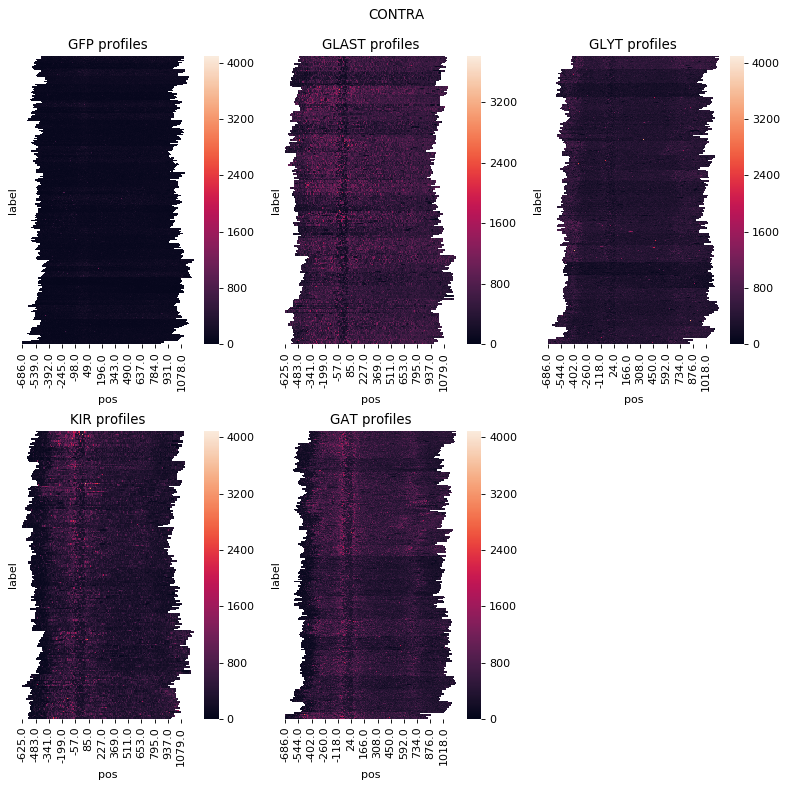

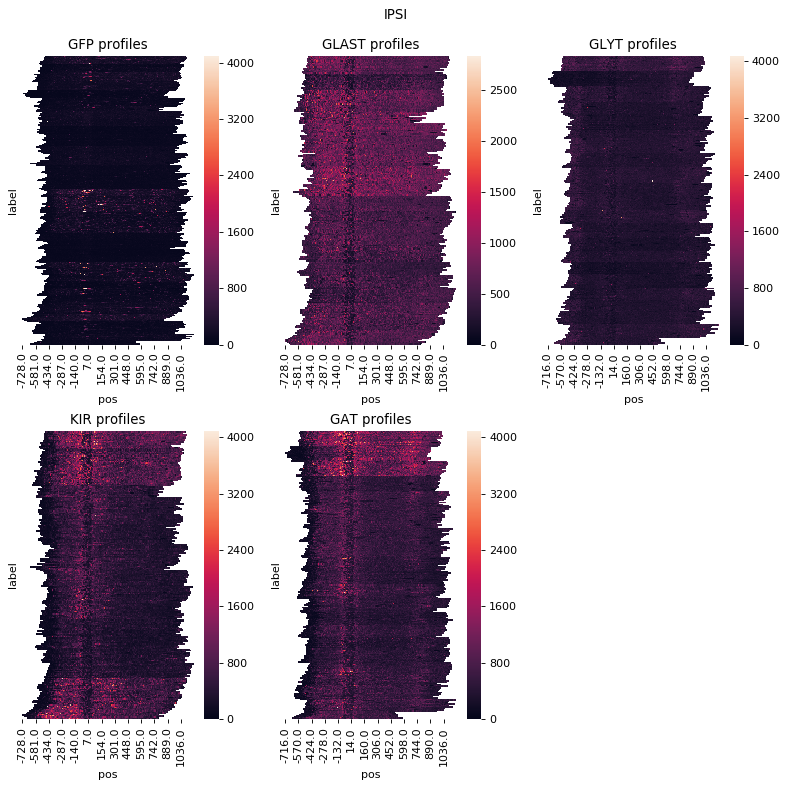

In [8]:
for region in ICR203.meta['region'].unique():
    fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    for i, stain in enumerate(ICR203.meta['stain'].unique(), start=1):
        ax = fig.add_subplot(2,3, i)
        ax = profiles.plot_heatmap(ICR203.data[ICR203.data['region'] == region], stain)
    fig.tight_layout()
    fig.suptitle(region)
    fig.subplots_adjust(top=0.92)
    plt.show()  

## plot line per animal

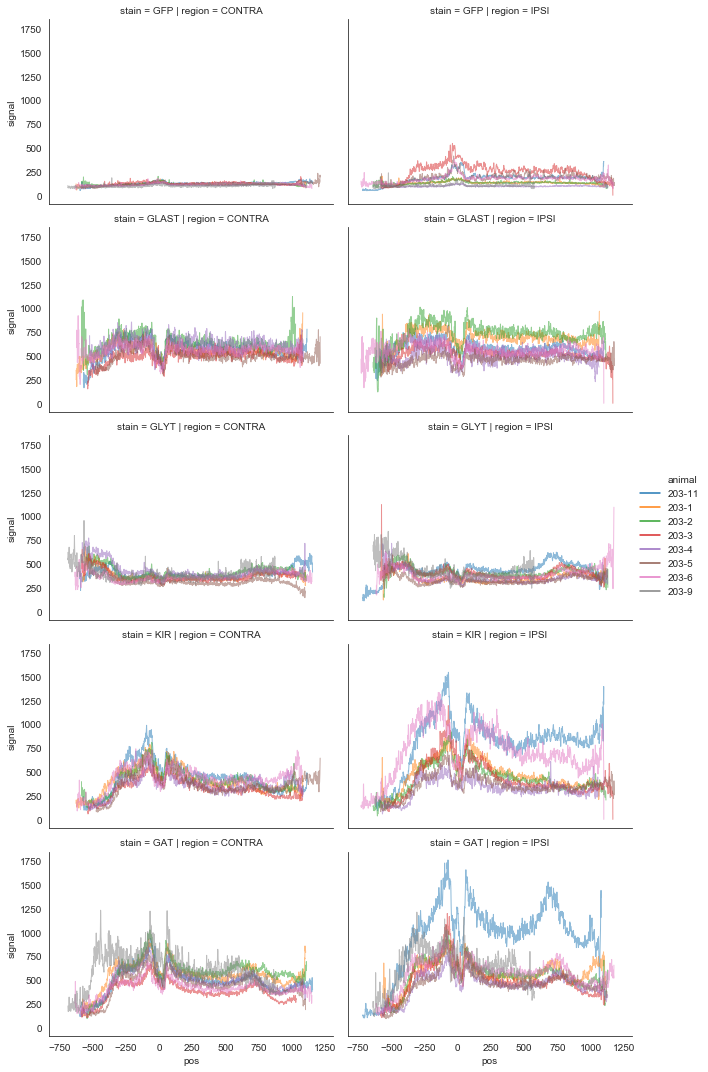

In [9]:
# region and animal
sns.set_style("white")
sns.relplot(x="pos",
            y="signal",
            hue="animal",
            col="region",
            row="stain", 
            height=3, aspect=1.5, linewidth=1,
            kind="line",
            data=ICR203.data, 
            alpha=0.5,
            ci=None
            )
#fig.tight_layout()
plt.show()

## Plot per geno

In [10]:
sub_agg = ICR203.data.\
                    groupby(['stain', 'region', 'geno', 'animal', 'pos']).\
                    agg(mean_signal=pd.NamedAgg(column='signal', aggfunc='mean'))

In [11]:
sub_agg.reset_index(inplace=True)  
sub_agg


,stain,region,geno,animal,pos,mean_signal
0,GAT,CONTRA,DOX,203-11,-596.0,116.333
1,GAT,CONTRA,DOX,203-11,-595.0,145.110
2,GAT,CONTRA,DOX,203-11,-594.0,139.318
3,GAT,CONTRA,DOX,203-11,-593.0,116.003
4,GAT,CONTRA,DOX,203-11,-592.0,115.692
...,...,...,...,...,...,...
127701,KIR,IPSI,Vehicle,203-5,1175.0,404.844
127702,KIR,IPSI,Vehicle,203-5,1176.0,381.929
127703,KIR,IPSI,Vehicle,203-5,1177.0,341.531
127704,KIR,IPSI,Vehicle,203-5,1178.0,309.854


In [12]:
sub_agg = sub_agg.astype({'pos': 'int32'})
sub_agg

,stain,region,geno,animal,pos,mean_signal
0,GAT,CONTRA,DOX,203-11,-596,116.333
1,GAT,CONTRA,DOX,203-11,-595,145.110
2,GAT,CONTRA,DOX,203-11,-594,139.318
3,GAT,CONTRA,DOX,203-11,-593,116.003
4,GAT,CONTRA,DOX,203-11,-592,115.692
...,...,...,...,...,...,...
127701,KIR,IPSI,Vehicle,203-5,1175,404.844
127702,KIR,IPSI,Vehicle,203-5,1176,381.929
127703,KIR,IPSI,Vehicle,203-5,1177,341.531
127704,KIR,IPSI,Vehicle,203-5,1178,309.854


In [13]:
sub_agg = sub_agg[(sub_agg["pos"] >= -500 ) & (sub_agg["pos"] <= 1000 )]
sub_agg

,stain,region,geno,animal,pos,mean_signal
96,GAT,CONTRA,DOX,203-11,-500,237.094767
97,GAT,CONTRA,DOX,203-11,-499,236.971133
98,GAT,CONTRA,DOX,203-11,-498,230.720267
99,GAT,CONTRA,DOX,203-11,-497,238.500500
100,GAT,CONTRA,DOX,203-11,-496,230.489400
...,...,...,...,...,...,...
127522,KIR,IPSI,Vehicle,203-5,996,358.881303
127523,KIR,IPSI,Vehicle,203-5,997,359.587219
127524,KIR,IPSI,Vehicle,203-5,998,340.266500
127525,KIR,IPSI,Vehicle,203-5,999,327.699500


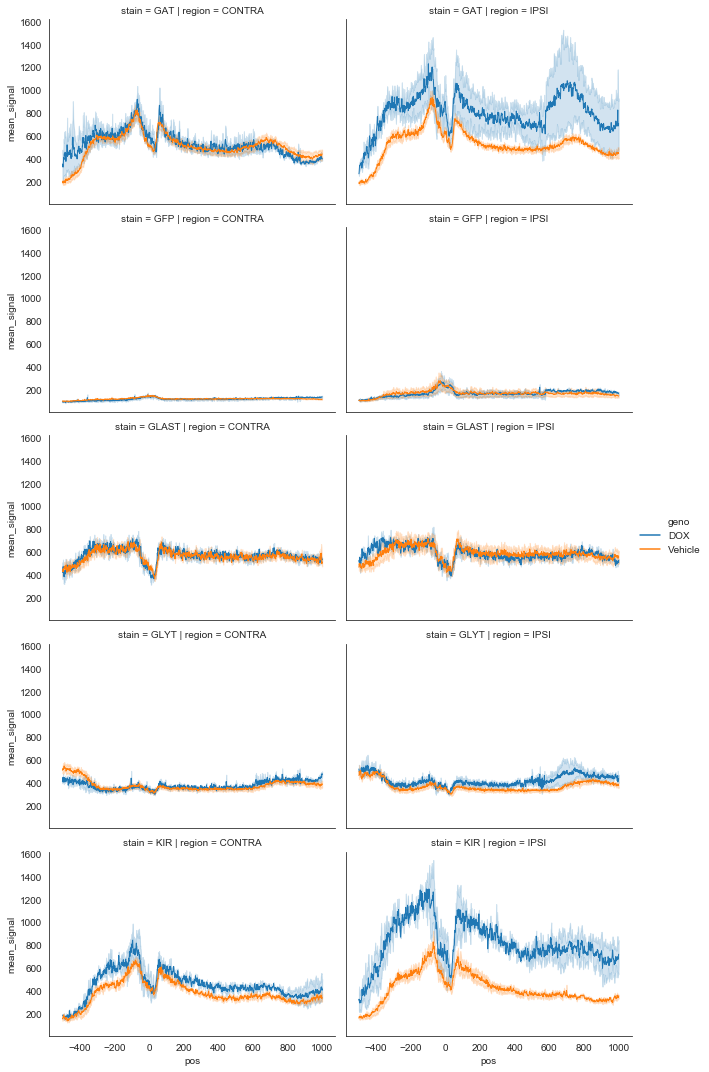

In [14]:
# compare region, geno for each gene
sns.set_style("white")

fig = sns.relplot(x="pos",
            y="mean_signal",
            hue="geno",
            col="region",
            row="stain", 
            height=3, aspect=1.5, linewidth=1,
            kind="line",
            data=sub_agg,
            ci=68
            )

plt.show()
     

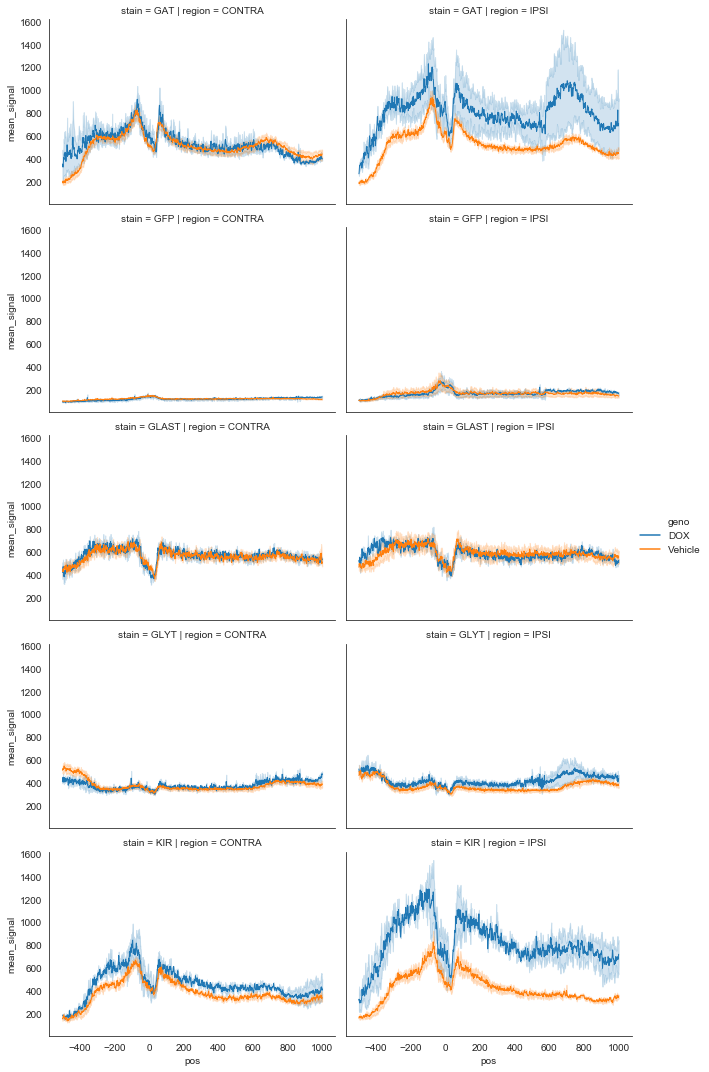

In [15]:
fig.fig

In [16]:
fig.savefig("../figures/ICR203_geno_trace.pdf")

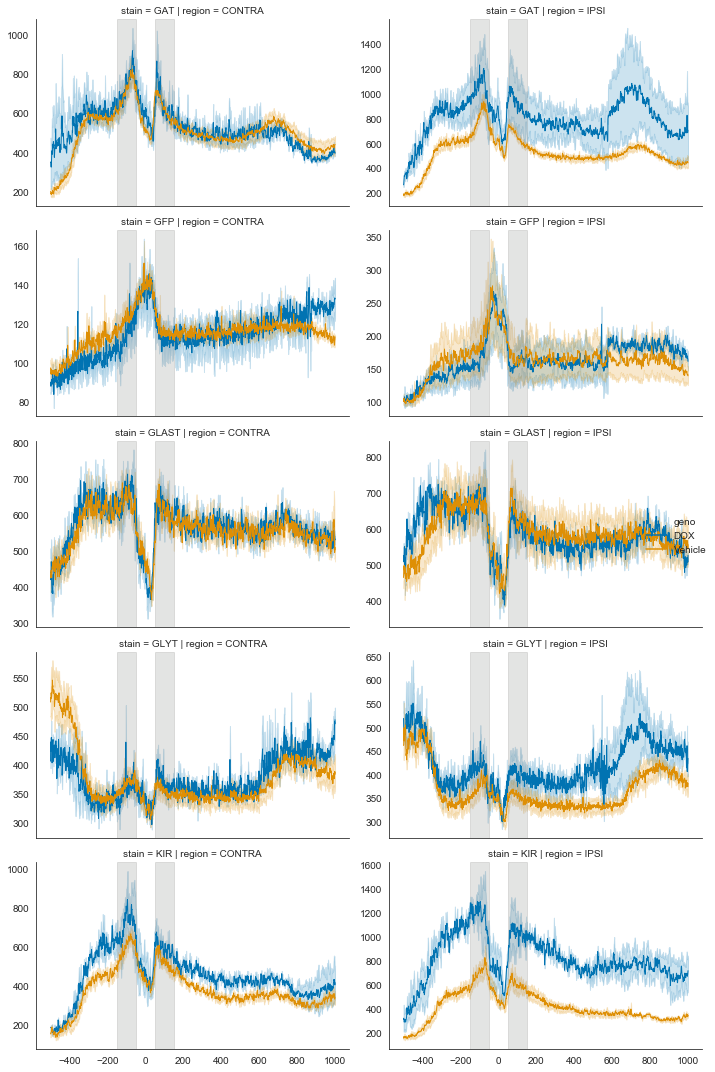

In [17]:
trace_per_animal_by_geno(ICR203.data)

## Plot subregions

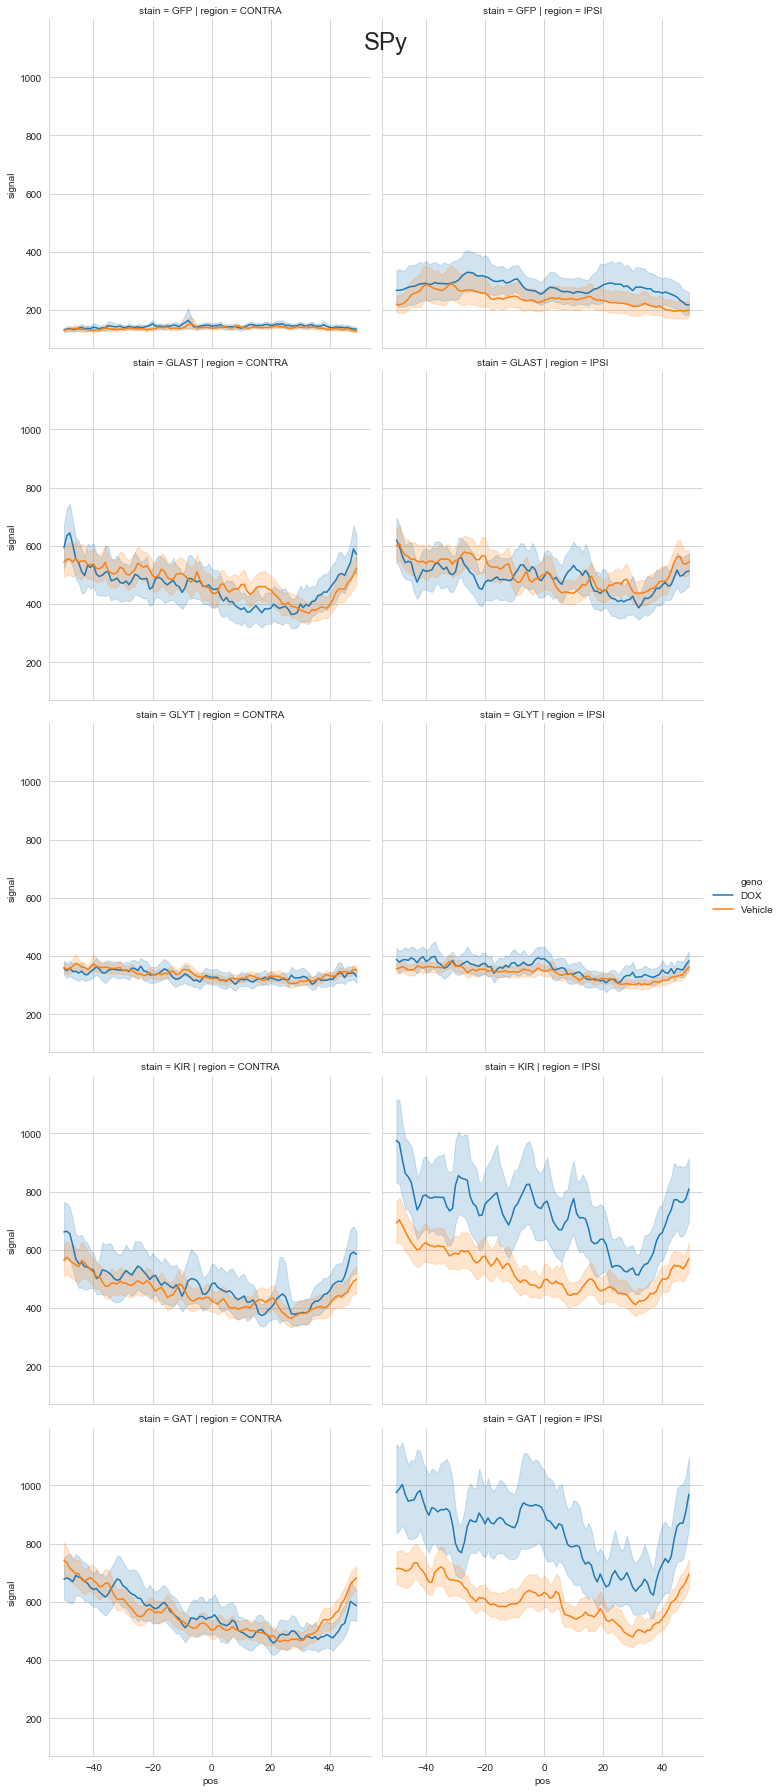

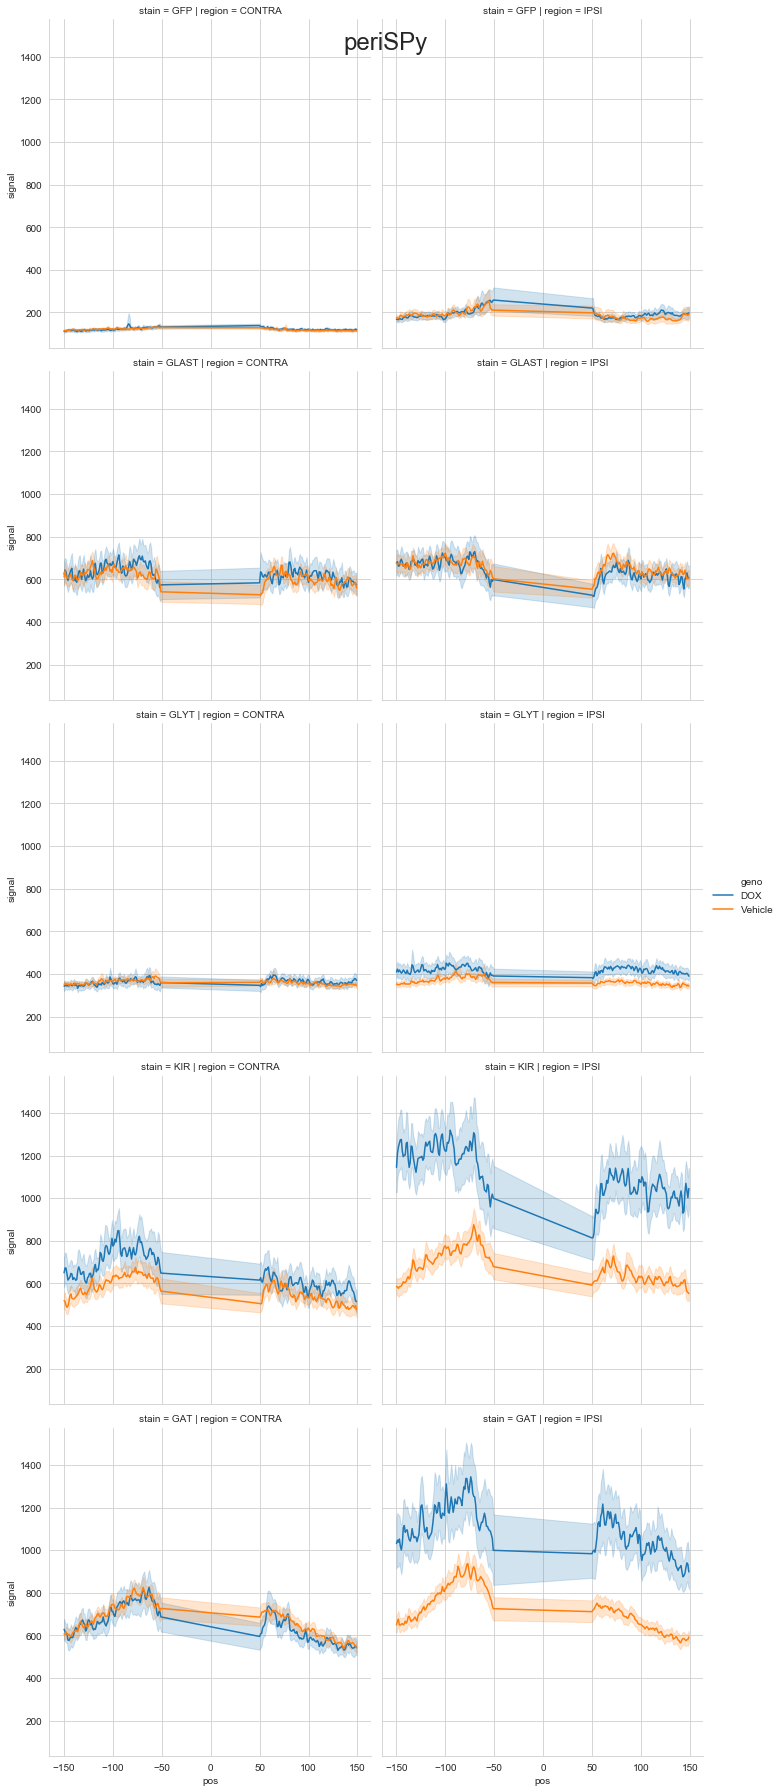

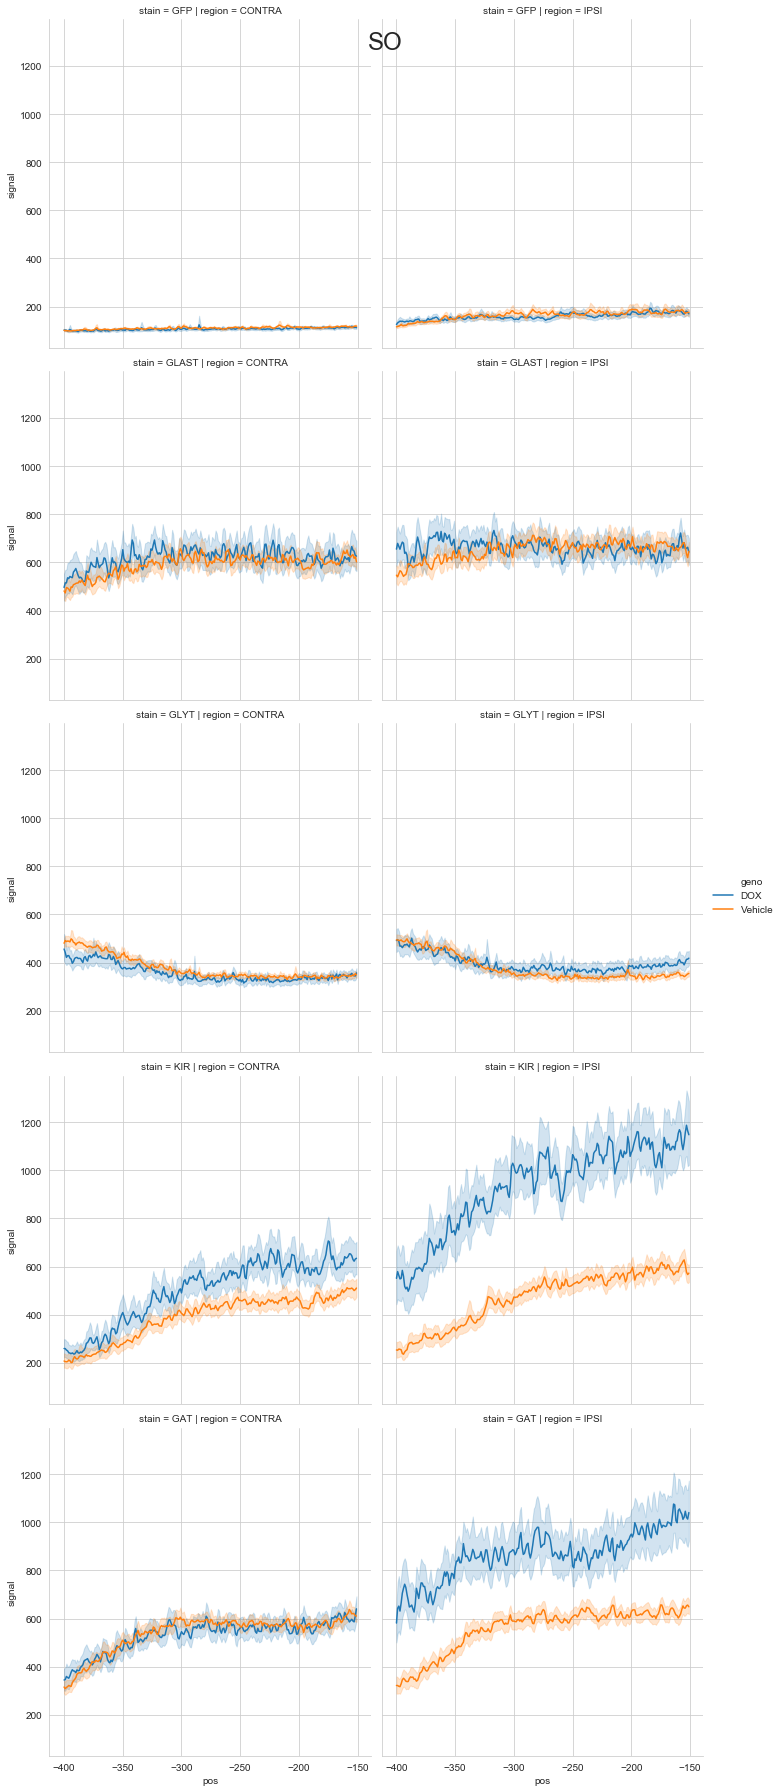

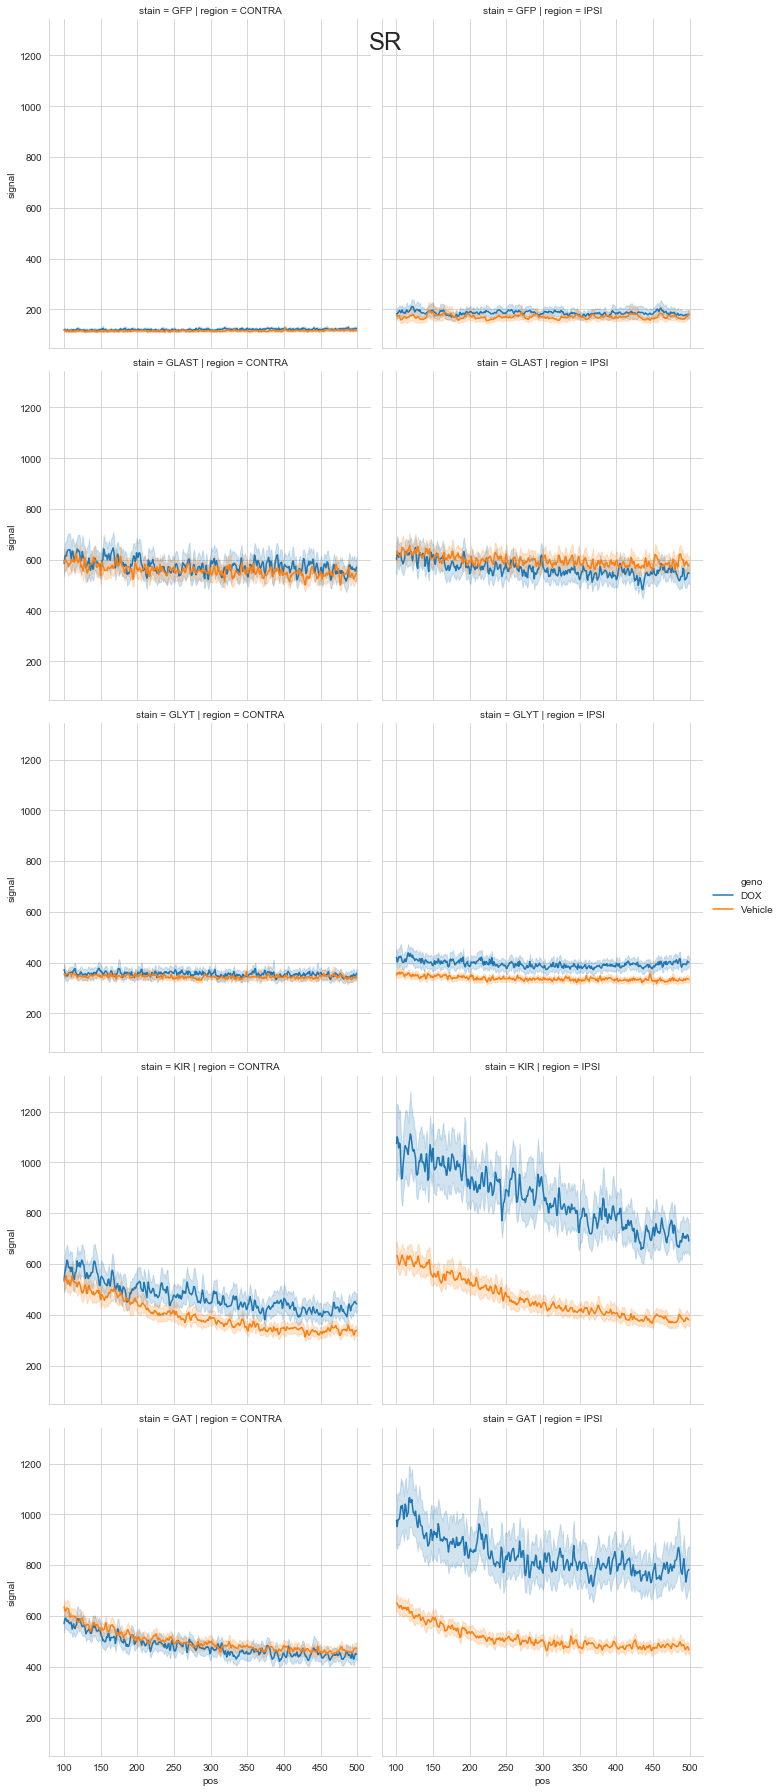

In [18]:
for subregion in subregions:
    sub = ICR203.data[ICR203.data['pos'].isin(subregions[subregion])]
    sns.set_style("whitegrid")
    ax = sns.relplot(x="pos", y="signal", hue="geno", col="region",
            row="stain", 
            #height=3, aspect=1.5, linewidth=1,
            kind="line", data=sub,
            ci=95)
    ax.fig.suptitle(subregion, fontsize=24)
    plt.show()

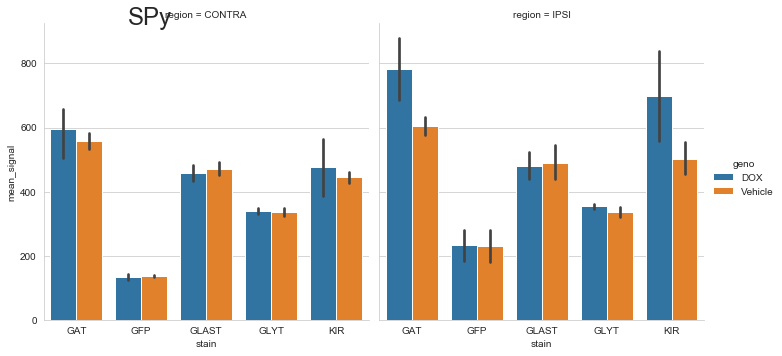

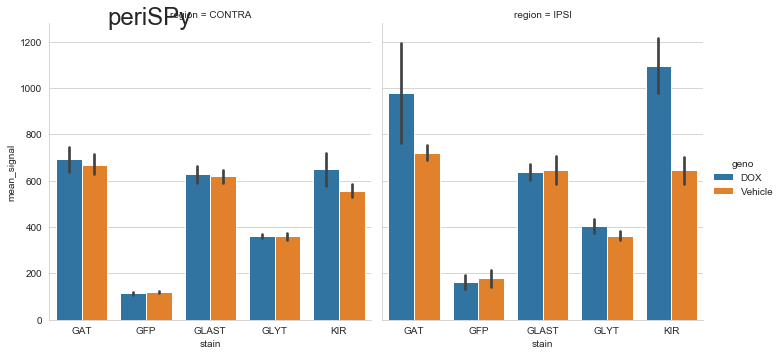

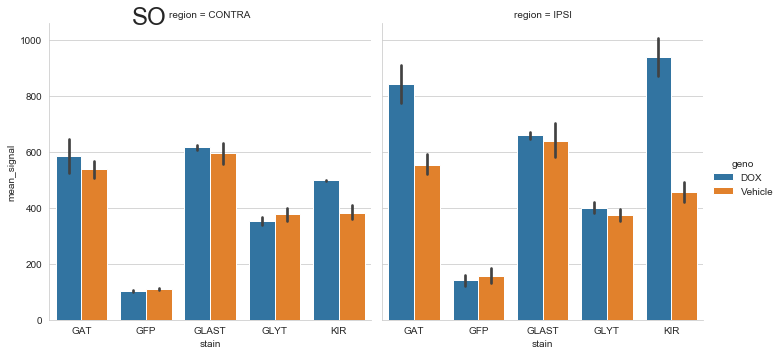

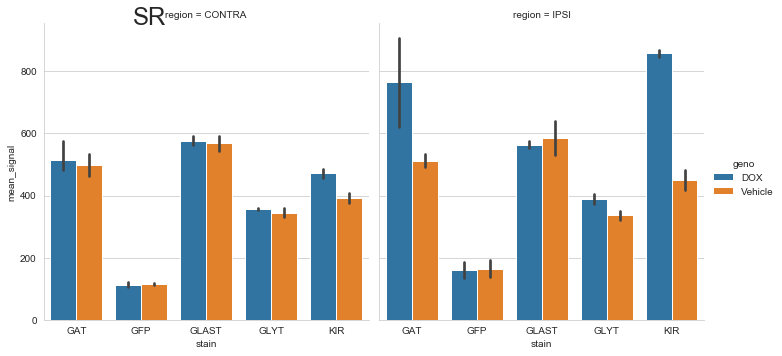

In [19]:
plot_datapoints(ICR203.data, subregions, "bar", "../figures/ICR_203_bar")

Output Averages for Each Animal and Subregion

In [20]:
for subregion in subregions:
    sub_agg = ICR203.data[ICR203.data['pos'].isin(subregions[subregion])].\
        groupby(['stain', 'region', 'geno', 'animal']).agg(
            mean_signal=pd.NamedAgg(column='signal', aggfunc='mean'))
    sub_agg.unstack().sort_values(by=['region', 'geno']).to_csv("../output/ICR203_{}_mean.csv".format(subregion))


In [21]:
grouped_ttests(ICR203.data, subregions)

,stain,region,subregion,geno1,geno2,geno1_mean,geno2_mean,geno1_n,geno2_n,p-value
0,GAT,CONTRA,SPy,DOX,Vehicle,596.286923,557.373152,3,5,0.591219
1,GAT,IPSI,SPy,DOX,Vehicle,782.985183,603.374852,3,5,0.121159
2,GFP,CONTRA,SPy,DOX,Vehicle,134.354132,137.657642,3,5,0.750475
3,GFP,IPSI,SPy,DOX,Vehicle,232.063982,228.783566,3,5,0.969386
4,GLAST,CONTRA,SPy,DOX,Vehicle,458.727537,471.835225,2,5,0.754053
5,GLAST,IPSI,SPy,DOX,Vehicle,481.393104,490.827627,2,5,0.931156
6,GLYT,CONTRA,SPy,DOX,Vehicle,339.411650,336.799595,3,5,0.907767
7,GLYT,IPSI,SPy,DOX,Vehicle,354.379103,337.476569,3,5,0.535806
8,KIR,CONTRA,SPy,DOX,Vehicle,476.117968,446.255508,2,5,0.615760
9,KIR,IPSI,SPy,DOX,Vehicle,698.369072,502.452924,2,5,0.159991
